### Types of Encoding in Machine Learning

1. [Label Encoding or Ordinal Encoding](#label-encoding-or-ordinal-encoding)
2. [One Hot Encoding](#one-hot-encoding)
3. [Dummy Encoding](#dummy-encoding)
4. [Effect Encoding](#effect-encoding)
5. [Hash Encoding](#hash-encoding)
6. [Binary Encoding](#binary-encoding)
7. [Base N Encoding](#base-n-encoding)
8. [Target Encoding](#target-encoding)


## Label Encoding or Ordinal Encoding


In [7]:
import category_encoders as ce
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import time
import matplotlib.pyplot as plt
import random


Label Encoding (also known as Ordinal Encoding) is one of the simplest types of encoding techniques. It assigns a unique integer to each category in a categorical variable based on their order. In some cases, this order is arbitrary, but in other cases, the categories may have a natural order.

Here's a brief description and example of Label Encoding:

### [Label Encoding](#)
[Description](#): Label encoding transforms each unique category into a corresponding integer value. For example, if a categorical feature contains the values ["low", "medium", "high"], label encoding might convert them to [0, 1, 2].

[Use Case](#): This encoding is useful for ordinal data, where the categories have an inherent order or rank.

[Limitations](#): For non-ordinal categorical variables, the numeric values may mislead machine learning algorithms into thinking that there is some ordinal relationship between categories when there isn't.

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example data
data = {'quality': ['low', 'medium', 'high', 'medium', 'low']}
df = pd.DataFrame(data)

# Applying Label Encoding
label_encoder = LabelEncoder()
df['quality_encoded'] = label_encoder.fit_transform(df['quality'])

df


,quality,quality_encoded
0,low,1
1,medium,2
2,high,0
3,medium,2
4,low,1


In [14]:

# Input DataFrame
train_df = pd.DataFrame({'Degree': ['High school', 'Masters', 'Diploma', 'Bachelors', 
                                    'Bachelors', 'Masters', 'Phd', 'High school', 'High school']})

# Corrected mapping with case-sensitive match
encoder = ce.OrdinalEncoder(
    cols=['Degree'], 
    return_df=True,  # Return the transformed data as a DataFrame
    mapping=[{
        'col': 'Degree',
        'mapping': {
            'None': 0,  # No degree
            'High school': 1,  # Lowest ordinal rank
            'Diploma': 2,
            'Bachelors': 3,
            'Masters': 4,
            'Phd': 5  # Highest ordinal rank
        }
    }]
)


# Transform data
encoded_df = encoder.fit_transform(train_df)

print(train_df)

encoder.fit_transform(train_df)

        Degree
0  High school
1      Masters
2      Diploma
3    Bachelors
4    Bachelors
5      Masters
6          Phd
7  High school
8  High school


,Degree
0,1
1,4
2,2
3,3
4,3
5,4
6,5
7,1
8,1


<B>Explanation:<br>
The OrdinalEncoder converts the Degree column into numeric ordinal values based on the mapping you provided.
This encoding is useful for ordinal categorical variables where the categories have a meaningful order (e.g., levels of education).
By using the mapping, you ensured that the encoding follows a specific order that reflects the progression from the lowest education level 
(None) to the highest (Phd).

#### Time complexity graph


1. [Random Input Size Generation](#):
    list of 7 random integers between 10 and 100,000 to simulate different input sizes for encoding. These sizes are sorted in ascending order
    to ensure that smaller datasets are processed before larger ones.

2. [Data Generation and Encoding](#):
    For each size in sizes, a pandas DataFrame is created that contains a column 'Degree' with repeated values ('High school', 'Masters',
            'Diploma', 'Bachelors', and 'Phd'). The number of rows in the DataFrame is determined by the size value.<br>
    Encoding Time:
        The time taken to perform ordinal encoding is measured using time.time() before and after calling encoder.fit_transform(data). 
        The difference is the elapsed time, which is then stored in the times list.


3. [Plotting the Results:](#):
    This block of code creates a plot that shows how the time required for ordinal encoding increases as the number of rows (input size) increases.
        Key components of the plot:<br>
    X-axis: The number of rows in the dataset.<br>
    Y-axis: The time (in seconds) taken to perform ordinal encoding.<br>
    Marker ('o'): Each point on the plot represents a different dataset size and its corresponding encoding time.

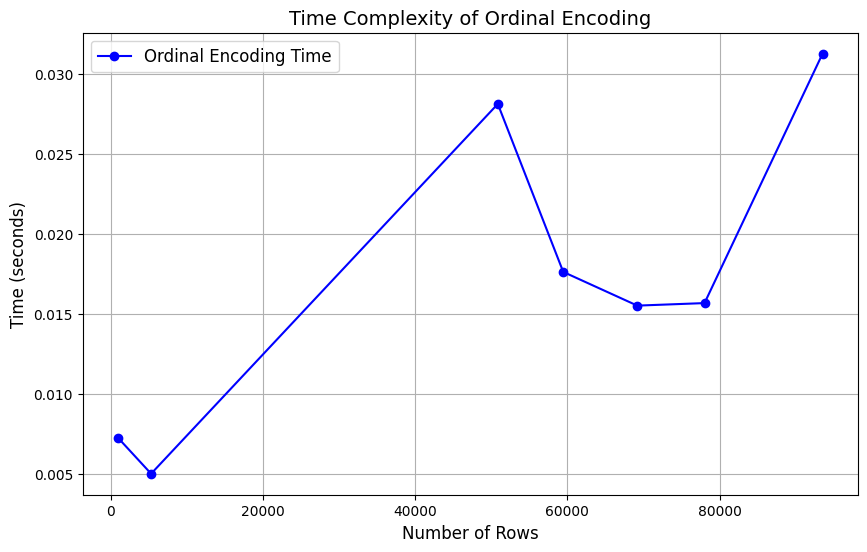

In [21]:
sizes = [random.randint(10, 100000) for _ in range(7)]
sizes.sort()
times = []
for size in sizes:
    # Generate sample data
    data = pd.DataFrame({'Degree': ['High school', 'Masters', 'Diploma', 'Bachelors', 'Phd'] * (size // 5)})
    
    
    # Measure time for encoding
    start_time = time.time()
    encoder.fit_transform(data)
    times.append(time.time() - start_time)

# Plotting the time complexity graph
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', color='b', label='Ordinal Encoding Time')
plt.title("Time Complexity of Ordinal Encoding", fontsize=14)
plt.xlabel("Number of Rows", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


#### Time Complexity Explanation:
Ordinal encoding essentially assigns an integer to each unique category in the 'Degree' column. As the size of the dataset grows, the time taken increases linearly because:

Data Size Impact: The larger the input data (more rows), the more work is required to assign integers to the categories.
Number of Categories: Since the number of unique categories (e.g., 'High school', 'Masters', etc.) stays constant, the time complexity will scale linearly with the number of rows, making it O(n).

### One Hot Encoding

1. [Sample Data:](#) The data DataFrame contains a list of cities in the 'City' column.
2. [One-Hot Encoding:](#) The ce.OneHotEncoder creates a separate binary column for each unique value in the 'City' column. For each row, one of these binary columns will contain 1 to indicate the presence of the city in that row, while all other binary columns will be 0.
3. [Handling Unknown Values:](#) The handle_unknown='return_nan' argument ensures that if the encoder encounters a new city that wasn't present during the training, it returns NaN.

In [22]:
data=pd.DataFrame({'City':[
'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
]})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='City',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


The encoder.fit_transform(data) function will:
1. Fit: Learn the unique categories in the 'City' column.
2. Transform: Create new binary columns for each unique city and replace the original column with these one-hot encoded columns.

In [23]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

,City_Delhi,City_Mumbai,City_Hydrabad,City_Chennai,City_Bangalore
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0


#### Practical Use

One-Hot Encoding is particularly useful in machine learning models that cannot directly handle categorical data. It converts categorical variables into a format that can be provided to algorithms to improve their predictive performance. Most algorithms require input to be numeric, and this technique is one way to achieve that

### Dummy Encoding:
Dummy Encoding is similar to One-Hot Encoding, but with one key difference: it drops one of the encoded columns to avoid multicollinearity in the dataset. This is often useful when working with machine learning models where including all columns from One-Hot Encoding can introduce redundancy.

1. [Sample Data:](#)This creates a pandas DataFrame with a single column 'City' that contains several cities as categorical data.

In [51]:
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']})

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


2. [Dummy Encoding Using pd.get_dummies():](#)The pd.get_dummies() function is used to perform Dummy Encoding, where:

[data:](#) The original DataFrame (which contains the 'City' column).<br>
[drop_first=True:](#) This parameter drops the first category (in this case, it will drop the column corresponding to the first city). This is what makes it "dummy" encoding, as it reduces the number of columns by one, ensuring there are no redundant features.

In [27]:
#encode the data
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded

,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai
0,False,True,False,False
1,False,False,False,True
2,False,False,True,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,False,False,True,False


<b>Explanation:<br>

The pd.get_dummies() encoding technique is used here to perform one-hot encoding, which is ideal for nominal data like the City column, where categories such as Delhi, Mumbai, and Hyderabad have no inherent order or ranking. The drop_first=True parameter is used to avoid multicollinearity by removing one of the binary columns (the "reference category"). This reduces redundancy while still representing the categorical variable effectively. This technique ensures that the data is suitable for machine learning models, treating each category independently and avoiding any false numerical relationships.

### Effect Encoding

1. [Sample Data:](#) the column 'City' contains categorical values, representing various cities.

2. [Effect Encoding with SumEncoder:](#) <br>
    ce.SumEncoder: This is the category_encoders class used to perform Effect Encoding (Sum Encoding).<br>
    cols=['City']: Specifies which column(s) should be encoded.<br>
    verbose=False: Suppresses extra information output<br>

In [37]:
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad']})

# Initialize SumEncoder
encoder = ce.SumEncoder(cols=['City'], verbose=False)
print(data)
print("\n\n")
encoder.fit_transform(data)

        City
0      Delhi
1     Mumbai
2  Hyderabad
3    Chennai
4  Bangalore
5      Delhi
6  Hyderabad





,intercept,City_0,City_1,City_2,City_3
0,1,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0
4,1,-1.0,-1.0,-1.0,-1.0
5,1,1.0,0.0,0.0,0.0
6,1,0.0,0.0,1.0,0.0


<b>Effect Encoding Explanation:<br>


Effect Encoding (also known as Deviation Encoding or Sum Encoding) is an encoding technique similar to One-Hot Encoding, but with a key difference: instead of representing categories with 0 and 1, it uses -1 to indicate the absence of a category, and the sum of the encoded values for each row will be zero.

In this encoding, one category (the baseline or reference category) is dropped, and the other categories are encoded in a way that expresses the difference between each category and the baseline. This is useful when you are more interested in the differences between levels of a categorical variable than in the absolute value of the category.

### Hash Encoder

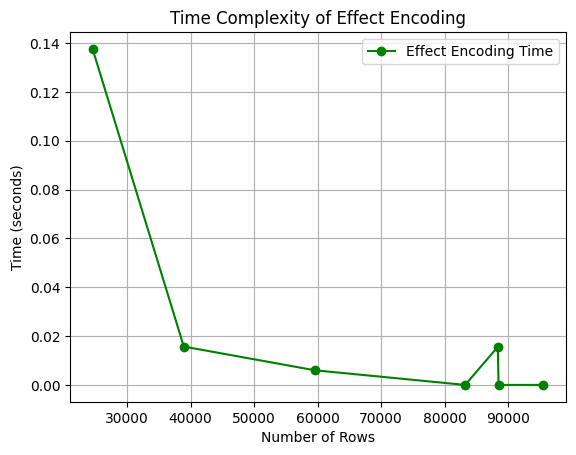

In [38]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []
target = [random.choice([0, 1]) for _ in range(100000)]

for size in sizes:
    city_list = ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5) + ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'][:size % 5]
    data = pd.DataFrame({
        'City': city_list,
        'Target': target[:size]
    })
    
    start_time = time.time()
    encoding = data.groupby('City')['Target'].mean()
    data['City_encoded'] = data['City'].map(encoding)
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='g', label='Effect Encoding Time')
plt.title("Time Complexity of Effect Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


In [54]:
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)
print(data)

print("\n\n")
#Fit and Transform Data
encoder.fit_transform(data)

       Month
0    January
1      April
2      March
3      April
4    Februay
5       June
6       July
7       June
8  September





,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


### Binary Encoding

<br>Binary Encoding Explanation<br>
Binary Encoding is an encoding technique that combines properties of both One-Hot Encoding and Hash Encoding. It works by converting each category into its ordinal number, then representing that number as a binary string. Each binary digit is stored in a separate column, meaning fewer columns are created compared to One-Hot Encoding when there are many categories.

[Key Steps of Binary Encoding:](#)
[Ordinal Encoding:](#) Each unique category is first assigned an integer (ordinal number).<br>
[Binary Conversion:](#) These ordinal integers are then converted into binary form.<br>
[Splitting Binary Digits:](#) Each binary digit is represented as a separate column in the final encoded data.<br>

In [58]:
# Sample data
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad', 'Mumbai', 'Agra']})

# ce.BinaryEncoder: The category_encoders class used to perform binary encoding.
# cols=['City']: Specifies which column(s) to encode.
# return_df=True: Returns a pandas DataFrame as the output.

# Initialize BinaryEncoder
encoder = ce.BinaryEncoder(cols=['City'], return_df=True)

print(data)
print("\n\n")

encoder.fit_transform(data)

        City
0      Delhi
1     Mumbai
2  Hyderabad
3    Chennai
4  Bangalore
5      Delhi
6  Hyderabad
7     Mumbai
8       Agra





,City_0,City_1,City_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,0,0,1
6,0,1,1
7,0,1,0
8,1,1,0


### Base N Encoding

Base-N Encoding is a type of encoding that represents categorical variables as a set of columns, using a base-N numerical system. The base is determined by the number of unique categories. For example, in Base-2 Encoding (Binary Encoding), the base is 2, meaning we use 2 digits (0 and 1) to represent each category. Similarly, for Base-3 Encoding, we would use 3 digits (0, 1, and 2).

[Key Concept:](#)
Each category is first assigned an ordinal integer (like in ordinal encoding).
The ordinal value is then represented in a specified base (e.g., Base-2, Base-3, etc.).
The resulting base-N representation is split into individual columns.

In [60]:

# Sample data
data = pd.DataFrame({
    'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad', 'Mumbai', 'Agra']
})

print(data)
print("\n\n")
# Initialize BaseNEncoder with base 3
encoder = ce.BaseNEncoder(cols=['City'], base=3, return_df=True)

# Fit and transform the data
encoded_data = encoder.fit_transform(data)

# Display the result
print(encoded_data)


        City
0      Delhi
1     Mumbai
2  Hyderabad
3    Chennai
4  Bangalore
5      Delhi
6  Hyderabad
7     Mumbai
8       Agra



   City_0  City_1
0       0       1
1       0       2
2       1       0
3       1       1
4       1       2
5       0       1
6       1       0
7       0       2
8       2       0


<br>Conclusion:<br>
Base-N encoding is an efficient and flexible way to handle categorical variables with a large number of categories. It uses fewer columns compared to One-Hot Encoding, making it memory-efficient while preserving the ordinal relationships between categories.

<br>[Advantages of Base-N Encoding:](#)<br>
[Flexible Base:](#) You can use any base depending on your requirements. For instance, Base-2 (binary) or Base-3 (ternary) depending on how many categories you have.<br>
[Efficient for Large Categories:](#) Like binary encoding, this method reduces the number of columns needed compared to One-Hot Encoding. It is especially useful for high cardinality categorical features.<br>
[Useful for Tree-Based Models:](#) Base-N encoding works well with models like decision trees and random forests, which can naturally handle numeric features.

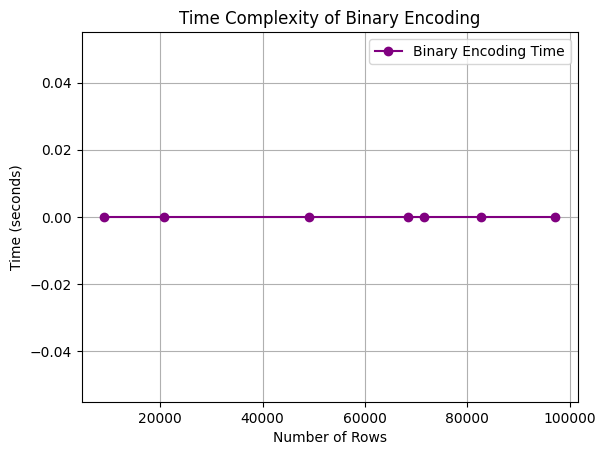

In [62]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []

for size in sizes:
    data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5)})
    
    start_time = time.time()
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='purple', label='Binary Encoding Time')
plt.title("Time Complexity of Binary Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


### Target Encoding

Target Encoding is a technique where categorical features are encoded by replacing the category with the average value of the target variable (such as Marks in your case) for that category. This technique is particularly useful in regression or classification tasks where the target variable can be continuous or categorical, and it captures useful information about the relationship between the feature and the target.

1. [Input Data: The dataset consists of two columns:](#) class (categorical variable) and Marks (target variable).
2. [Calculating the Mean of Marks for Each Class:](#) We calculate the average Marks for each class. This will give us a mapping between each 
    class and the mean marks for that class.
3. [Applying Target Encoding:](#) We use the map() function to replace each class with the corresponding mean marks calculated above.

In [46]:
data = pd.DataFrame({
    'class': ['A', 'B', 'C', 'B', 'C', 'A', 'A', 'A'],
    'Marks': [50, 30, 70, 80, 45, 97, 80, 68]
})

# Calculate the mean of Marks for each class (Target Encoding)
target_encoding = data.groupby('class')['Marks'].mean()
data



,class,Marks
0,A,50
1,B,30
2,C,70
3,B,80
4,C,45
5,A,97
6,A,80
7,A,68


In [47]:
data['class_encoded'] = data['class'].map(target_encoding)

# Display the encoded data
print(data)

  class  Marks  class_encoded
0     A     50          73.75
1     B     30          55.00
2     C     70          57.50
3     B     80          55.00
4     C     45          57.50
5     A     97          73.75
6     A     80          73.75
7     A     68          73.75


#### [Advantages of Target Encoding:](#)
Captures Target Information: Target encoding takes into account the relationship between the feature and the target variable, which can be more informative than arbitrary encoding methods like One-Hot Encoding or Ordinal Encoding.
Reduces Dimensionality: It reduces the number of features compared to One-Hot Encoding, especially when there are many categories.
Works Well with Tree-Based Models: It can be particularly useful with tree-based models, as it preserves the ordinal relationship between the feature and the target.
#### [Risks/Disadvantages:](#)
Overfitting: Target encoding can cause overfitting, especially in small datasets. Regularization techniques such as cross-validation, adding noise, or smoothing can be used to mitigate this risk.
Leakage: If the target values are directly used to encode the features without proper cross-validation or careful splitting of data, it can lead to data leakage.
#### [Conclusion:](#)
Target Encoding is a powerful technique that encodes categorical variables based on their relationship with the target variable. It works particularly well in scenarios where preserving the relationship between categories and the target is crucial. However, proper care needs to be taken to prevent overfitting or leakage.